In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import IPython.display as ipd
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()  # Choose your .wav file when prompted
# --- 1. Load Audio File ---
# Get filename (from upload dict)
filename = list(uploaded.keys())[0]
fs, audio_in = wavfile.read(filename)
# Convert to floating point between -1 and 1 for processing
if audio_in.dtype == np.int16:
    audio_in = audio_in.astype(np.float32) / 32767.0
elif audio_in.dtype == np.uint8:
    audio_in = (audio_in.astype(np.float32) - 128.0) / 128.0
# If stereo, just use the left channel
if audio_in.ndim > 1:
    audio_in = audio_in[:, 0]
# --- 2. Your Filter Coefficients from MATLAB ---
b_lp = np.array([0.00044327, 0.00088655, 0.00044327])
a_lp = np.array([1.00000000, -1.93957021, 0.94134330])
b_bp = np.array([0.02887858, 0.00000000, -0.05775716, 0.00000000, 0.02887858])
a_bp = np.array([1.00000000, -3.43307147, 4.45473479, -2.60198911, 0.58058555])
b_hp = np.array([0.73853871, -1.47707742, 0.73853871])
a_hp = np.array([1.00000000, -1.40750534, 0.54664949])
# --- 3. Simulate Potentiometers (Change these values!) ---
# 1.0 = normal volume, 0.0 = muted, 2.0 = 2x volume
gain_bass = 2.0   # Boost the bass
gain_mid  = 1.5  # Cut the mids
gain_treble = 0.5 # Slightly boost the treble
# --- 4. Process the Audio ---
# Filter the input signal into three separate bands
output_bass = signal.lfilter(b_lp, a_lp, audio_in)
output_mid = signal.lfilter(b_bp, a_bp, audio_in)
output_treble = signal.lfilter(b_hp, a_hp, audio_in)
# Apply gain to each band and mix them back together
final_output = (output_bass * gain_bass) + \
               (output_mid * gain_mid) + \
               (output_treble * gain_treble)
# Normalize the output to prevent clipping (loud distortion)
max_val = np.max(np.abs(final_output))
if max_val > 1.0:
    final_output /= max_val
# --- 5. Play the Audio in Colab ---
print("Original Audio:")
display(ipd.Audio(audio_in, rate=fs))
print("\nEqualized Audio:")
display(ipd.Audio(final_output, rate=fs))
# Optional: Save the output to a new WAV file
wavfile.write('equalized_output.wav', fs, (final_output * 32767).astype(np.int16))

Saving Perfect - Ed Sheeran cut5.wav to Perfect - Ed Sheeran cut5.wav
Original Audio:


/tmp/ipython-input-3270940833.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_in = wavfile.read(filename)



Equalized Audio:


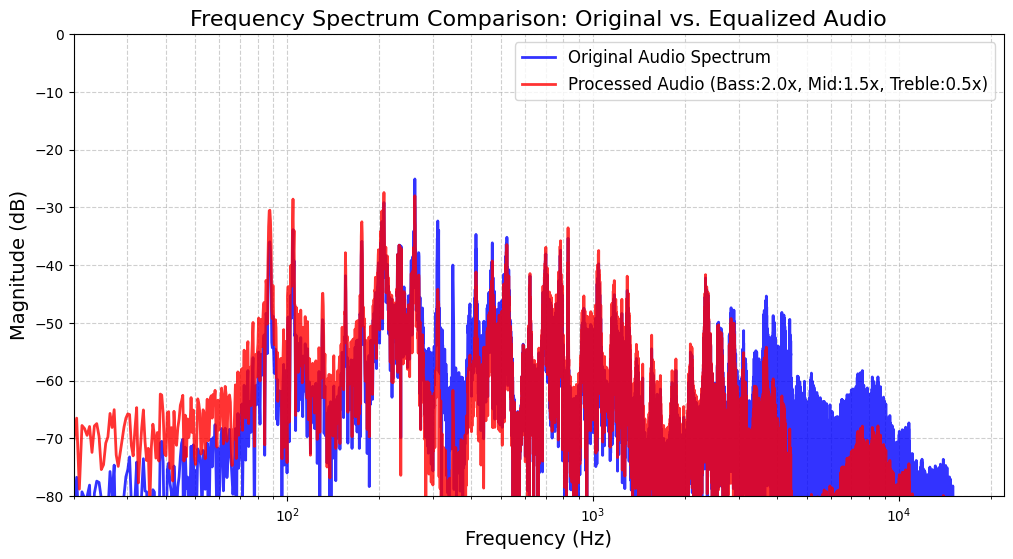

Original Audio:



Equalized Audio:


In [ ]:
# --- 5. Spectrum Analysis and Plotting ---
import numpy as np
import matplotlib.pyplot as plt # <--- This is the fix for the NameError
from scipy.fft import fft, fftfreq
# ... continue with other imports and the rest of your code
def plot_spectrum(signal_data, fs, label, color):
    """Calculates and plots the magnitude spectrum in dB."""
    N = len(signal_data)

    # Check if signal is valid (not empty or all zeros)
    if N == 0 or np.all(signal_data == 0):
      print(f"Warning: Cannot plot spectrum for {label} - signal is empty or silent.")
      return

    # Compute the FFT
    yf = fft(signal_data)
    xf = fftfreq(N, 1 / fs)

    # Take only the positive half of the spectrum (up to Nyquist frequency)
    xf_pos = xf[:N//2]

    # Calculate magnitude and normalize by N
    yf_pos = 2.0/N * np.abs(yf[0:N//2])

    # Convert magnitude to decibels (dB) - add a small offset (1e-6) to prevent log(0)
    magnitude_db = 20 * np.log10(yf_pos + 1e-6)

    plt.plot(xf_pos, magnitude_db, label=label, color=color, alpha=0.8, linewidth=2)

# Create the plot figure
plt.figure(figsize=(12, 6))

# Plot the spectrums
plot_spectrum(audio_in, fs, 'Original Audio Spectrum', 'blue')
plot_spectrum(final_output, fs, f'Processed Audio (Bass:{gain_bass}x, Mid:{gain_mid}x, Treble:{gain_treble}x)', 'red')

# Configure the plot for a formal report
plt.title('Frequency Spectrum Comparison: Original vs. Equalized Audio', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Magnitude (dB)', fontsize=14)
plt.xscale('log') # Use a log scale for frequency to highlight bass and mid-range detail
plt.xlim(20, fs/2) # Show spectrum from 20 Hz (start of human hearing) to Nyquist frequency
plt.ylim(-80, 0)   # Set a typical audio magnitude range
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

# --- 6. Play the Audio in Colab ---
print("Original Audio:")
display(ipd.Audio(audio_in, rate=fs))
print("\nEqualized Audio:")
display(ipd.Audio(final_output, rate=fs))

# Optional: Save the output to a new WAV file
wavfile.write("equalized_output.wav", fs, (final_output * 32767).astype(np.int16))